# **Generador Aleatorio de Diagramas de Circuitos Resistivos** 
#### By: Cristian Alape, Alvaro Zarabanda, Youssef Ortiz 

## *Primera actividad*

Conociendo los conceptos de las leyes de Kirchhoff y el concepto de malla. A través de un código que lo genere, obtener el diagrama de un circuito aleatorio de una malla, que solo tiene cuatro elementos:

$X = \left[ 2,3,4,5 \right]$ 

$P = \left[ \frac{1}{4},\frac{1}{4},\frac{1}{4},\frac{1}{4} \right]$

$H = va(x, p, 2, 1)$

$V = va(x, p, 2, 1)$

Determinar matemáticamente el valor de la probabilidad de que el circuito generado cumpla con las leyes de Kirchhoff, si se considera que los parámetros de los elementos son distintos. Luego, validen dicho resultado por medio de una simulación.

Para determinar estas probabilidades inicialmente, según la naturaleza de las leyes de Kirchhoff se evalúan dos criterios de invalidez para diagramas de circuitos resistivos de una malla 

### **Criterio 1**: cuando hay más de una fuente de corriente en el circuito de una malla 

cuando se tiene una fuente de corriente en un circuito de una sola malla (es decir, conectada en serie), la fuente de corriente debe tener el mismo valor y dirección de corriente para que el circuito sea físicamente consistente, todos los componentes están conectados en serie. Esto significa que la misma corriente fluye a través de cada componente del circuito.

Si se intentara imponer una segunda fuente de corriente, por ejemplo, una de 2 amperios, y otra fuente en serie de 3 amperios en la misma dirección, esto es físicamente imposible. La corriente en un circuito en serie debe ser la misma en todos los puntos.

### **Criterio 2**: cuando hay solo voltajes (4) y cortos (2) 

En un circuito de una malla no todos sus elementos pueden ser cortocircuitos porque esto eliminaría la función del circuito, además, La Ley de Voltajes de Kirchhoff (LVK) establece que la suma algebraica de todas las diferencias de potencial alrededor de cualquier lazo cerrado debe ser igual a cero. Si se tiene una fuente de voltaje (V) en la malla y todos los demás elementos son cortocircuitos (con una caída de voltaje idealmente cero), la ecuación de la LVK sería:

$V - 0 - 0 - ... - 0 = 0 $

$V = 0$

Esto implica que la fuente de voltaje debe ser cero, lo cual contradice la existencia de una fuente de voltaje activa. 

### Procedimiento para generar los circuitos aleatorios  

Inicialmente se define la función va(x,p,m,n) la cual recibe los siguientes parámetros:
- **x**: el conjunto de datos de la matriz según los números asignados a los diferentes elementos del circuito resistivo 
- **p**:  distribuciones de probabilidad sobre el conjunto de valores el x. cada elemento de p representa la probabilidad de que cada elemento de x sea seleccionado en el circuito.
- **m**: filas de la matriz de entrada
- **n**:  columnas de la matriz de entrada  

El objetivo de esta función es realizar un muestreo aleatorio con los elementos de x. Esto significa que cada vez que se selecciona un elemento para la matriz, se hace de forma independiente según las probabilidades definidas en p.  

La probabilidad de seleccionar un valor específico de x es siempre la misma, independientemente de las selecciones anteriores. Por lo tanto, esta función implementa un proceso para generar realizaciones de matrices aleatorias basadas en una distribución de probabilidad discreta dada. 

Una vez definida la función va, que genera las matrices de forma aleatoria, se definen 100000 experimentos aleatorios en la simulación donde se generan las matrices del circuito generado en cada iteración. 

### Experimento aleatorio

Este consiste en realizar cuatro extracciones independientes de la lista de elementos del circuito $(x = [2, 3, 4, 5])$, donde cada número corresponde a un elemento y tiene una probabilidad de $(p = 0.25)$ de ser seleccionado. Estas cuatro extracciones se obtienen combinando los elementos de dos matrices $(H)$ y $(V)$, cada una de dimensión $(1 \times 2)$, generadas por la función va. 

### Espacio muestral

El espacio muestral $(\Omega)$ de este experimento consiste en todas las posibles combinaciones de elementos del circuito definidos como: $({2, 3, 4, 5})$. El tamaño del espacio muestral es $(|\Omega| = 4^4 = 256)$, ya que cada una de las cuatro posiciones puede tomar uno de los cuatro valores posibles. Se asume que cada una de estas 256 secuencias es equiprobable, con una probabilidad de $((0.25)^4 = \frac{1}{256})$. 

### Probabilidades en criterio 1  

- SI aparecen dos fuentes de corriente hay $(\binom{4}{2} = 6)$ formas de elegir las dos posiciones donde aparece. Las otras dos posiciones pueden tomar cualquiera de los otros 3 elementos $(({2, 3, 4}))$. Por lo tanto, hay $(6 \times 3^2 = 54)$ secuencias donde la fuente de corriente aparece exactamente dos veces.
- Si aparecen tres fuentes de corriente hay $(\binom{4}{3} = 4)$ formas de elegir las tres posiciones donde aparece. La otra posición puede tomar cualquiera de los otros 3 valores. Por lo tanto, hay $(4 \times 3^1 = 12)$ secuencias donde la fuente de corriente aparece exactamente tres veces.
- Si aparecen cuatro fuentes de corriente hay $(\binom{4}{4} = 1)$ forma de que aparezca en las cuatro posiciones (la secuencia es $[5, 5, 5, 5]$)

El número total de secuencias que cumplen la Condición 1 es $(54 + 12 + 1 = 67)$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{67}{256})$. 

### Probabilidades criterio 2  

Cuando todos los elementos son cortocircuitos o fuentes de voltaje, si consideramos que estos elementos hay $(2^4 = 16)$ secuencias de este tipo de elementos. Por lo tanto, hay $(16 - 1 = 15)$ secuencias que cumplen la Condición 2, por lo tanto, $(\frac{15}{256})$. 

### Probabilidad Teórica Total 

Se define teorico_total = teorico_1 + teorico_2. Esto es demustra porque las dos condiciones son mutuamente excluyentes. Si la Condición 1 se cumple (la fuente de corriente aparece al menos dos veces), entonces la Condición 2 no puede cumplirse (ya que la Condición 2 requiere que todos los elementos sean cortocircuitos o fuentes de voltaje). 

Por lo tanto, la probabilidad teórica de que se cumpla la Condición 1 o la Condición 2 es: $[P(\text{Condición 1 o Condición 2}) = P(\text{Condición 1}) + P(\text{Condición 2}) = \frac{67}{256} + \frac{15}{256} = \frac{82}{256} = \frac{41}{128}]$ 

### Resultados Experimentales 

La simulación corre el experimento aleatorio 100,000 veces. Las variables almacenan las frecuencias relativas con las que se cumplen la Condición 1 y la Condición 2, respectivamente. Según la Ley de los Grandes Números, a medida que el número de experimentos aumenta, estas frecuencias relativas deberían aproximarse a las probabilidades teóricas correspondientes. 
- fr_1 debería ser aproximadamente igual a teorico_1 $((\frac{67}{256} \approx 0.2617))$.
- fr_2 debería ser aproximadamente igual a teorico_2 $((\frac{15}{256} \approx 0.0586))$.
- fr_total debería ser aproximadamente igual a teorico_total $((\frac{82}{256} \approx 0.3203))$. 

### Diagramas de flujo previo al codigo

#### Función generadora de elementos aleatorios 

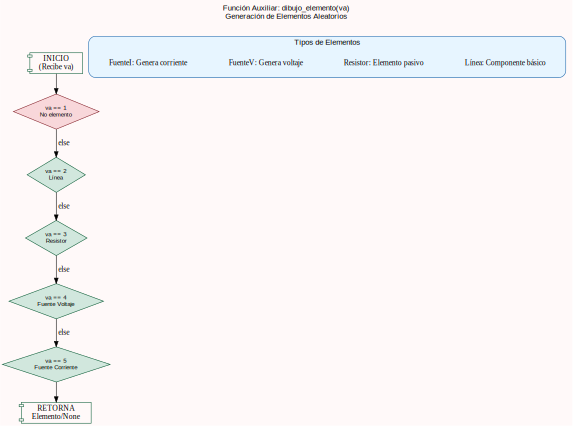

In [2]:
from graphviz import Digraph

# Configuración del diagrama de función
func_dot = Digraph('ElementFlow', filename='element_func.gv')
func_dot.attr(rankdir='TB',
              size='8,10',
              bgcolor='#fff9f9',
              fontname='Arial',
              label='Función Auxiliar: dibujo_elemento(va)\nGeneración de Elementos Aleatorios\n\n',
              labelloc='t')

# Estilo para casos
case_style = {
    'shape': 'diamond',
    'style': 'filled',
    'fontname': 'Arial',
    'fontsize': '11'
}

# Nodos
func_dot.node('FStart', 'INICIO\n(Recibe va)', shape='component', fillcolor='#d1e7dd', color='#0a5c36')
func_dot.node('Case1', 'va == 1\nNo elemento', fillcolor='#f8d7da', color='#842029', **case_style)
func_dot.node('Case2', 'va == 2\nLínea', fillcolor='#d1e7dd', color='#0a5c36', **case_style)
func_dot.node('Case3', 'va == 3\nResistor', fillcolor='#d1e7dd', color='#0a5c36', **case_style)
func_dot.node('Case4', 'va == 4\nFuente Voltaje', fillcolor='#d1e7dd', color='#0a5c36', **case_style)
func_dot.node('Case5', 'va == 5\nFuente Corriente', fillcolor='#d1e7dd', color='#0a5c36', **case_style)
func_dot.node('FEnd', 'RETORNA\nElemento/None', shape='component', fillcolor='#d1e7dd', color='#0a5c36')

# Conexiones en forma de árbol
func_dot.edge('FStart', 'Case1')
func_dot.edge('Case1', 'Case2', label='else')
func_dot.edge('Case2', 'Case3', label='else')
func_dot.edge('Case3', 'Case4', label='else')
func_dot.edge('Case4', 'Case5', label='else')
func_dot.edge('Case5', 'FEnd')

# Leyenda de elementos
with func_dot.subgraph(name='cluster_legend') as legend:
    legend.attr(label='Tipos de Elementos',
                style='rounded,filled',
                fillcolor='#e7f5ff',
                color='#1864ab')
    legend.node('L1', 'Línea: Componente básico', shape='plaintext')
    legend.node('L2', 'Resistor: Elemento pasivo', shape='plaintext')
    legend.node('L3', 'FuenteV: Genera voltaje', shape='plaintext')
    legend.node('L4', 'FuenteI: Genera corriente', shape='plaintext')

func_dot

#### Función constructora del circuito con elementos aleatorios  

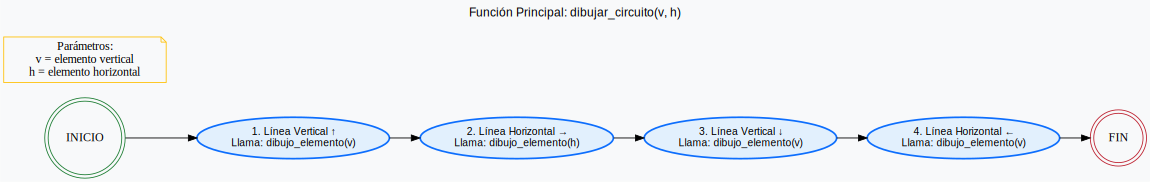

In [4]:
from graphviz import Digraph

# Configuración del diagrama principal
main_dot = Digraph('MainFlow', filename='main_circuit.gv')
main_dot.attr(rankdir='LR',
              size='16',
              bgcolor='#f8f9fa',
              fontname='Arial',
              label='Función Principal: dibujar_circuito(v, h)\n\n',
              labelloc='t')

# Estilo para nodos principales
main_style = {
    'style': 'filled,rounded',
    'fontname': 'Arial',
    'fontsize': '12',
    'penwidth': '2',
    'fillcolor': '#e2f0fd',
    'color': '#0d6efd'
}

# Nodos
main_dot.node('Start', 'INICIO', shape='doublecircle', fillcolor='#28a745', color='#1e7e34')
main_dot.node('Step1', '1. Línea Vertical ↑\nLlama: dibujo_elemento(v)', **main_style)
main_dot.node('Step2', '2. Línea Horizontal →\nLlama: dibujo_elemento(h)', **main_style)
main_dot.node('Step3', '3. Línea Vertical ↓\nLlama: dibujo_elemento(v)', **main_style)
main_dot.node('Step4', '4. Línea Horizontal ←\nLlama: dibujo_elemento(v)', **main_style)
main_dot.node('End', 'FIN', shape='doublecircle', fillcolor='#dc3545', color='#bd2130')

# Conexiones
main_dot.edges([
    ('Start', 'Step1'),
    ('Step1', 'Step2'),
    ('Step2', 'Step3'),
    ('Step3', 'Step4'),
    ('Step4', 'End')
])

# Nota de función
main_dot.node('FuncNote', 'Parámetros:\nv = elemento vertical\nh = elemento horizontal', 
              shape='note', fillcolor='#fff3bf', color='#ffc107')

main_dot

#### Función simulación 

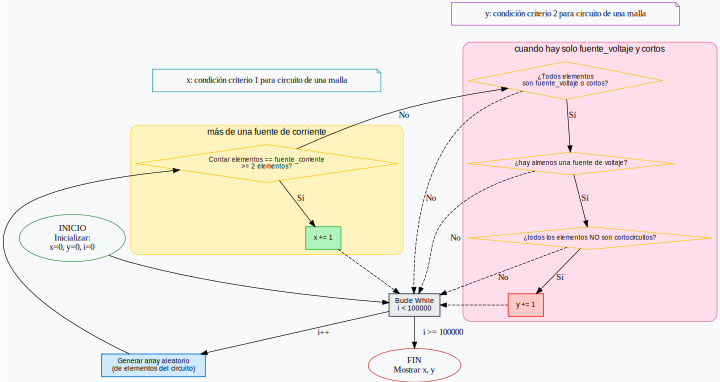

In [1]:
from graphviz import Digraph

dot = Digraph('LoopValidation', filename='loop_validation.gv')
dot.attr(rankdir='TB', size='10,8', bgcolor='#f8f9fa', fontname='Helvetica')

# ===== ESTILOS =====
node_style = {
    'style': 'filled',
    'fontname': 'Helvetica',
    'fontsize': '11',
    'shape': 'box',
    'penwidth': '1.5'
}

cond_style = {
    'shape': 'diamond',
    'fillcolor': '#ffec99',
    'color': '#ffc300',
    'fontname': 'Helvetica',
    'fontsize': '10'
}

# ===== NODOS PRINCIPALES =====
dot.node('Start', 'INICIO\nInicializar:\nx=0, y=0, i=0', 
         shape='ellipse', fillcolor='#40c057', color='#2b8a3e')

dot.node('Loop', 'Bucle While\ni < 100000', 
         fillcolor='#e9ecef', color='#495057', **node_style)

dot.node('GenArray', 'Generar array aleatorio\n(de elementos del circuito)', 
         fillcolor='#d0ebff', color='#1c7ed6', **node_style)

# ===== CONDICIÓN X =====
with dot.subgraph(name='cluster_x') as x_cluster:
    x_cluster.attr(label='más de una fuente de corriente', style='rounded,filled',
                  fillcolor='#fff3bf', color='#ffd43b')
    
    x_cluster.node('Check5', 'Contar elementos == fuente_corriente \n>= 2 elementos?', **cond_style)
    x_cluster.node('IncX', 'x += 1', 
                  fillcolor='#b2f2bb', color='#40c057', **node_style)

# ===== CONDICIÓN Y =====
with dot.subgraph(name='cluster_y') as y_cluster:
    y_cluster.attr(label='cuando hay solo fuente_voltaje y cortos', style='rounded,filled',
                  fillcolor='#ffdeeb', color='#f06595')
    
    y_cluster.node('CheckAll24', '¿Todos elementos\nson fuente_voltaje o cortos?', **cond_style)
    y_cluster.node('CheckAny4', '¿hay almenos una fuente de voltaje?', **cond_style)
    y_cluster.node('CheckAll2', '¿todos los elementos NO son cortocircuitos?', **cond_style)
    y_cluster.node('IncY', 'y += 1', 
                  fillcolor='#ffc9c9', color='#f03e3e', **node_style)

dot.node('End', 'FIN\nMostrar x, y', 
         shape='ellipse', fillcolor='#fa5252', color='#c92a2a')

# ===== CONEXIONES PRINCIPALES =====
dot.edge('Start', 'Loop')
dot.edge('Loop', 'GenArray', label='i++')
dot.edge('GenArray', 'Check5')

# Flujo Condición X
dot.edge('Check5', 'IncX', label='Sí')
dot.edge('Check5', 'CheckAll24', label='No')

# Flujo Condición Y
dot.edge('CheckAll24', 'CheckAny4', label='Sí')
dot.edge('CheckAll24', 'Loop', label='No', style='dashed')
dot.edge('CheckAny4', 'CheckAll2', label='Sí')
dot.edge('CheckAny4', 'Loop', label='No', style='dashed')
dot.edge('CheckAll2', 'IncY', label='Sí')
dot.edge('CheckAll2', 'Loop', label='No', style='dashed')

# Conexiones finales
dot.edge('IncX', 'Loop', style='dashed')
dot.edge('IncY', 'Loop', style='dashed')
dot.edge('Loop', 'End', label='i >= 100000')

# ===== NOTAS =====
dot.node('NoteX', 'x: condición criterio 1 para circuito de una malla', 
         shape='note', fillcolor='#e3fafc', color='#1098ad')
dot.node('NoteY', 'y: condición criterio 2 para circuito de una malla', 
         shape='note', fillcolor='#f3d9fa', color='#9c36b5')

dot.edge('NoteX', 'Check5', style='invis')
dot.edge('NoteY', 'CheckAll24', style='invis')

dot

## *Segunda actividad*

Conociendo los conceptos de las leyes de Kirchhoff y el concepto de malla. A través de un código que lo genere, obtener el diagrama de un circuito aleatorio de dos mallas, que solo tiene cuatro elementos:

$X = \left[ 2,3,4,5 \right]$ 

$P = \left[ \frac{1}{4},\frac{1}{4},\frac{1}{4},\frac{1}{4} \right]$

$H = va(x, p, 2, 1)$

$V = va(x, p, 2, 1)$

Determinar matemáticamente el valor de la probabilidad de que el circuito generado cumpla con las leyes de Kirchhoff, si se considera que los parámetros de los elementos son distintos. Luego, validen dicho resultado por medio de una simulación.

Para determinar estas probabilidades inicialmente, según la naturaleza de las leyes de Kirchhoff se evalúan dos criterios de invalidez para diagramas de circuitos resistivos de dos mallas 

### **Criterio 1**: cuando hay solo voltajes (4) y cortos (2) en cada malla y la exterior

En un circuito de una malla no todos sus elementos pueden ser cortocircuitos porque esto eliminaría la función del circuito, además, La Ley de Voltajes de Kirchhoff (LVK) establece que la suma algebraica de todas las diferencias de potencial alrededor de cualquier lazo cerrado debe ser igual a cero. Si se tiene una fuente de voltaje (V) en la malla y todos los demás elementos son cortocircuitos (con una caída de voltaje idealmente cero), la ecuación de la LVK sería:

$V - 0 - 0 - ... - 0 = 0 $

$V = 0$

Esto implica que la fuente de voltaje debe ser cero, lo cual contradice la existencia de una fuente de voltaje activa. Al aplicarse esto a cualquier lazo cerrado, el criterio aplica tanto para cada malla por separado como para los 6 elementos que rodean las mallas sin el elemento del medio

### **Criterio 2.1**: cuando hay más de una fuente de corriente en una malla

Cuando se tiene una fuente de corriente en un circuito de una sola malla (es decir, conectada en serie), la fuente de corriente debe tener el mismo valor y dirección de corriente para que el circuito sea físicamente consistente, todos los componentes están conectados en serie. Esto significa que la misma corriente fluye a través de cada componente del circuito.

Si se intentara imponer una segunda fuente de corriente, por ejemplo, una de 2 amperios, y otra fuente en serie de 3 amperios en la misma dirección, esto es físicamente imposible. La corriente en un circuito en serie debe ser la misma en todos los puntos.

### **Criterio 2.2**: cuando hay una fuente de corriente en el medio y al menos una en cada malla

Una fuente de corriente impone un flujo fijo de corriente y cuando se tiene una fuente en el nodo compartido de dos mallas, esta afecta a ambas por lo que, tener una fuente adicional en estas lleva a que el circuito sea imposible a menos que las fuentes sean perfectamente compatibles, algo que no se presenta en un modelo aleatorio.

### Experimento aleatorio

Este consiste en realizar cuatro extracciones independientes de la lista de elementos del circuito $(x = [2, 3, 4, 5])$, donde cada número corresponde a un elemento y tiene una probabilidad de $(p = 0.25)$ de ser seleccionado. Estas cuatro extracciones se obtienen combinando los elementos de dos matrices $(H)$ y $(V)$, cada una de dimensión $(1 \times 2)$, generadas por la función va. 

### Espacio muestral

El espacio muestral $(\Omega)$ de este experimento consiste en todas las posibles combinaciones de elementos del circuito definidos como: $({2, 3, 4, 5})$. El tamaño del espacio muestral es $(|\Omega| = 4^7 = 16384)$, ya que cada una de las siete posiciones puede tomar uno de los cuatro valores posibles. Se asume que cada una de estas 16384 secuencias es equiprobable, con una probabilidad de $((0.25)^7 = \frac{1}{16384})$. 

### Probabilidad de la intersección criterio 2

- $(\binom{3}{1} \times 3 + 1 = 10)$ formas de elegir la posicion en la que aparece. Las , por lo que hay $(10 \times 4 = 400)$ combinaciones donde la fuente de corriente aparece más de una vez en una malla y en el medio.

El número total de secuencias que cumplen ambas condiciones al tiempo es $(\binom{3}{1} \times 3^2)^2 \times 1 = 729$. La probabilidad teórica es, por lo tanto, $(\frac{729}{16384})$. 

El número total de secuencias que cumplen la Condición 1 es $2560 + 2560 + 729 - 400 = 5449$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{5449}{16384})$.

### Probabilidades criterio 1

- Cuando todos los elementos son cortocircuitos o fuentes de voltaje, si consideramos que estos elementos hay $(2^4 = 16)$ secuencias de este tipo de elementos en cada malla y $4^3 = 64$ para las otras 3 posiciones cada una con 4 posibles elementos. Por lo tanto, hay $(16 \times 64 = 1024)$ secuencias que cumplen la condición 2, por lo tanto, $(\frac{1024}{16384})$.
- El mismo análisis aplica para la otra malla.
- Para la malla exterior (6 posiciones rodeando el circuito sin el elemento del medio) se tienen $2^6 = 64$ combinaciones de cortos y fuentes de voltaje en la malla exterior, y $4$ formas de elegir elementos para el medio.

### Probabilidad de la intersección criterio 1

- Para la intersección entre las dos mallas, se tienen $(2^4 \times 2^3 = 128)$ formas de elegir cortos y fuentes de voltaje en una malla, y se multiplican con la cantidad de combinaciones con respecto a la otra malla (3 posiciones restantes).
- Para la intersección de una malla (4 posiciones) con la exterior (6 posiciones), se tienen $2^6$ combinaciones correspondientes a la exterior y 2 opciones para la posición del medio $(2^1), esto da como resultado $2^6 \times 2 = 128$
- La intersección de los 3 casos (cada malla y la exterior) tiene $2^3 \times 2^3 \times 2^1 = 128$ combinaciones.

El número total de secuencias que cumplen la Condición 2 es $1024 + 1024 + 256 - 128 - 128 - 128 + 128 = 2048$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{2048}{16384})$.

A este cálculo hay que restarle los casos en los que solamente hay cortos y se cumple la LVK:

- Cuando el circuito tiene solo cortos, el elemento en la posición del medio puede ser cualquiera entre cortos, resistencias o fuentes de corriente $(3)$.
- Cuando el circuito tiene cortos en una malla y 3 posiciones en la otra, hay $(\binom{7}{1} \times 2^3 = 56)$

El número total de secuencias que cumplen la Condición 2 termina siendo $1024 + 1024 + 256 - 128 - 128 - 128 + 128 - 115 = 1933$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{1933}{16384})$.

### Probabilidades en criterio 2.1

Para las probabilidades del criterio de corrientes cada malla cuenta con 3 posiciones (sin el nodo compartido)

- SI aparecen dos fuentes de corriente hay $(\binom{3}{2} = 3)$ formas de elegir las dos posiciones donde aparece. La otra posición pueden tomar cualquiera de los otros 3 elementos $(({2, 3, 4}))$. Por lo tanto, hay $(3 \times 3^1 = 9)$ secuencias donde la fuente de corriente aparece exactamente dos veces.
- Si aparecen tres fuentes de corriente hay solo 1 forma de elegir las tres posiciones donde aparece. Por lo tanto, hay 1 secuencia donde la fuente de corriente aparece exactamente tres veces.
- El número de combinaciones de las 4 posiciones restantes es $4^4$, ya que pueden ser cualquiera de los 4 elementos

El número total de secuencias que cumplen la Condición 1.1 es $((9 + 1) * 4^4= 2560)$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{2560}{16384})$. 

### Probabilidades en criterio 2.2

- Si aparece una fuente de corriente en una malla, hay $(\binom{3}{1} = 3)$ formas de elegir la posicion en la que aparece. Las otras dos posiciones pueden tener cualquiera de los 3 elementos restantes, por lo que hay $(3 \times 3^2 = 27)$ combinaciones donde la fuente de corriente aparece una vez en la malla.
- El mismo análisis aplica para la otra malla.
- Sólo hay 1 forma de elegir la posición del medio para la fuente de corriente.

El número total de secuencias que cumplen la Condición 1.2 es $(\binom{3}{1} \times 3^2)^2 \times 1 = 729$. La probabilidad teórica de la Condición 1 es, por lo tanto, $(\frac{729}{16384})$. 

### Probabilidad Teórica Total 

Se define teorico_total = teorico_1 + teorico_2 - intersección. Esto porque las dos condiciones no son mutuamente excluyentes. Si la Condición 1 se cumple (la fuente de corriente aparece al menos dos veces en una malla), aún la condición 2 puede cumplirse también. 

Por lo tanto, la probabilidad teórica de que se cumpla la Condición 1 o la Condición 2 es: $[P(\text{Condición 1 o Condición 2}) = P(\text{Condición 1}) + P(\text{Condición 2}) - P(\text{Intersección}) = \frac{5449}{16384} + \frac{1933}{16384} - \frac{300}{16384} = \frac{7082}{16384} = \frac{3541}{8192}] \approx 0.43225097656$ 

### Resultados Experimentales 

La simulación corre el experimento aleatorio 300,000 veces. Las variables almacenan las frecuencias relativas con las que se cumplen la Condición 1 y la Condición 2, respectivamente. Según la Ley de los Grandes Números, a medida que el número de experimentos aumenta, estas frecuencias relativas deberían aproximarse a las probabilidades teóricas correspondientes. 
- fr_1 debería ser aproximadamente igual a teorico_voltaje $((\frac{1933}{16384} \approx 0.11798))$.
- fr_2 debería ser aproximadamente igual a teorico_corriente $((\frac{5449}{16384} \approx 0.33258))$.
- fr_inv debería ser aproximadamente igual a teorico_total $((\frac{3541}{8192} \approx 0.43225097656))$. 